# Plotting

We've finally gotten to making plots! Plots are the fundamental way that science is communicated, so learning how to make plots is really key. Today we're going to focus on how to make a plot, while next week we'll look more closely at how to read in data and make plots form the data.


# Vocabulary for today

<b><ul>
    <li>spline</li>
    <li>resolution</li>
    <li>format string</li>
    <li>keyword arguments</li>
    <li>hex code</li>
    <li>linear spacing</li>
    <li>logarithmic spacing</li>
    </ul></b>

# Plotting with `matplotlib` 

*examples in this notebook are based on Nicholas Hunt-Walker's [plotting tutorial](https://github.com/nhuntwalker/teaching/blob/master/plotting_in_python.ipynb) and Jake VanderPlas' [matplotlib tutorial](https://github.com/jakevdp/2014_fall_ASTR599/blob/master/notebooks/06_MatplotlibIntro.ipynb) check these out if you want to read more about plotting with matplotlib* 

In this notebook we will learn how to make basic plots, how to customize these plots to display data the way we want to, how to make log-plots, and how to have many plots at once.

`matplotlib` is a huge and incredibly important python library that handles all things plotting. Most of the time you'll only be working with a subset of `matplotlib` called `pyplot`, let's import it!

In [1]:
import matplotlib.pyplot as plt
# Remember that because we imported as plt
# then we can call functions with plt.NAME_OF_FUNCTION

## Basic Plot Command

The fundamental function in matplotlibt is `plt.plot(x,y)`. This will plot points and connect them, where the (x,y) values of the points are given by the values in the arrays `x` and `y`.

To start getting plotted let's define an `x` and `y` array.

In [2]:
import numpy as np

In [14]:
x = np.linspace(1,10,num=20)

print(x)

[ 1.          1.47368421  1.94736842  2.42105263  2.89473684  3.36842105
  3.84210526  4.31578947  4.78947368  5.26315789  5.73684211  6.21052632
  6.68421053  7.15789474  7.63157895  8.10526316  8.57894737  9.05263158
  9.52631579 10.        ]


Let's try plotting a relatively simple equation:
$\begin{equation}
y = x
\end{equation}$

we can do this in code by just defining a variable `y` as so

In [11]:
y = x

print(y)

[ 1.          1.47368421  1.94736842  2.42105263  2.89473684  3.36842105
  3.84210526  4.31578947  4.78947368  5.26315789  5.73684211  6.21052632
  6.68421053  7.15789474  7.63157895  8.10526316  8.57894737  9.05263158
  9.52631579 10.        ]


Now that we've got an `x` array and a `y` array, let's see what the `plt.plot` function will do.

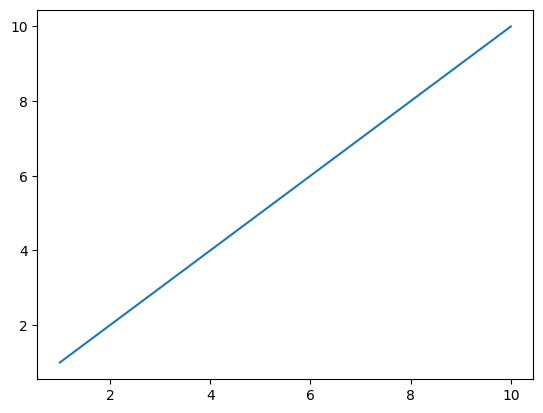

In [15]:
plt.plot(x,y)
# Remember that when you call a function, you must use parentheses
# that enclose around the arguments that the function will take

[-1.         -0.52631579 -0.05263158  0.42105263  0.89473684  1.36842105
  1.84210526  2.31578947  2.78947368  3.26315789  3.73684211  4.21052632
  4.68421053  5.15789474  5.63157895  6.10526316  6.57894737  7.05263158
  7.52631579  8.        ]


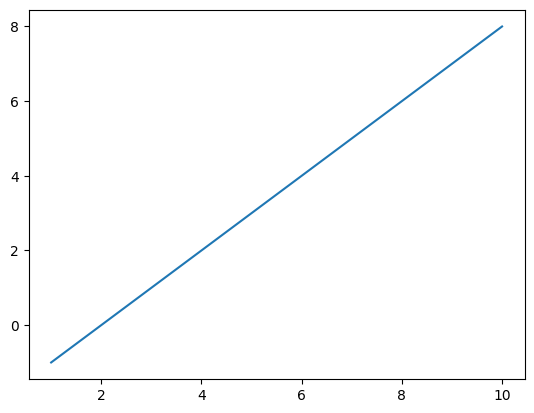

In [17]:
y2 = y - 2

print(y2)

plt.plot(x,y2)
# Remember that when you call a function, you must use parentheses
# that enclose around the arguments that the function will take

In [20]:
for i in range(len(x):
    ....

SyntaxError: invalid syntax (1470179901.py, line 1)

[np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]


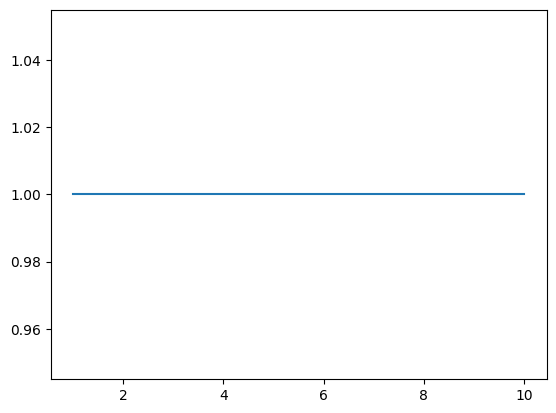

In [22]:
y3 = [y[0] for i in range(len(x))]

print(y3)

plt.plot(x,y3)

There it is! $y=x$, your first (of what will likely be many) plot!

$y=x$ is pretty nice, but let's get a little more fancy and try plotting $y = x^2$

In [23]:
y = np.power(x, 2)
#Confused about what's going on in this line? try running the cell below
print(y)

[  1.           2.17174515   3.79224377   5.86149584   8.37950139
  11.34626039  14.76177285  18.62603878  22.93905817  27.70083102
  32.91135734  38.57063712  44.67867036  51.23545706  58.24099723
  65.69529086  73.59833795  81.9501385   90.75069252 100.        ]


In [24]:
np.power?

Call signature:  np.power(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'power'>
File:            ~/miniconda3/lib/python3.12/site-packages/numpy/__init__.py
Docstring:      
power(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature])

First array elements raised to powers from second array, element-wise.

Raise each base in `x1` to the positionally-corresponding power in
`x2`.  `x1` and `x2` must be broadcastable to the same shape.

An integer type raised to a negative integer power will raise a
``ValueError``.

Negative values raised to a non-integral value will return ``nan``.
To get complex results, cast the input to complex, or specify the
``dtype`` to be ``complex`` (see the example below).

Parameters
----------
x1 : array_like
    The bases.
x2 : array_like
    The exponents.
    If ``x1.shape != x2.shape``, they must be broadcastable to a common
    shape (which becomes the shape of the output).
out : ndarray

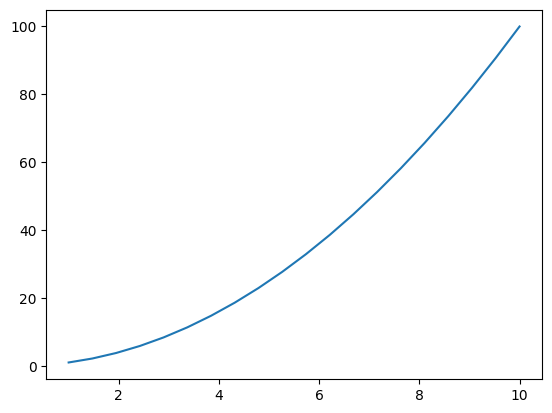

In [25]:
plt.plot(x,y)

[ 1.    3.25  5.5   7.75 10.  ]


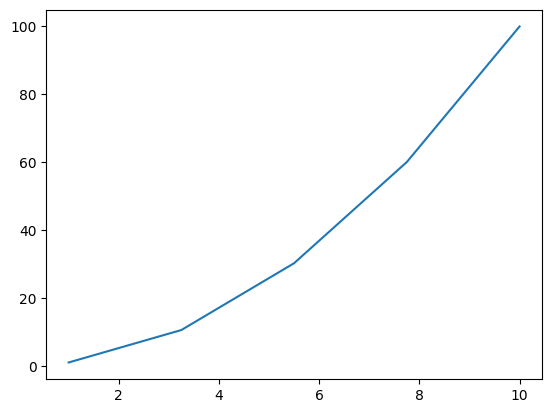

In [27]:
x = np.linspace(1,10,num=5)
print(x)

y = np.power(x, 2)

plt.plot(x,y)

That kind of looks like $y=x^2$ but it also looks a little jagged. This is because when `matplotlib` plots something, it actually draws a straight line between the (x,y) points that you give matplotlib. This is called a <b>spline</b>. `matplotlib` can just connect the dots that you give it.

So, to make this more smooth, we need to have many more points. To do that, let's use `np.linspace`

[ 3  5  2  1 10  6]


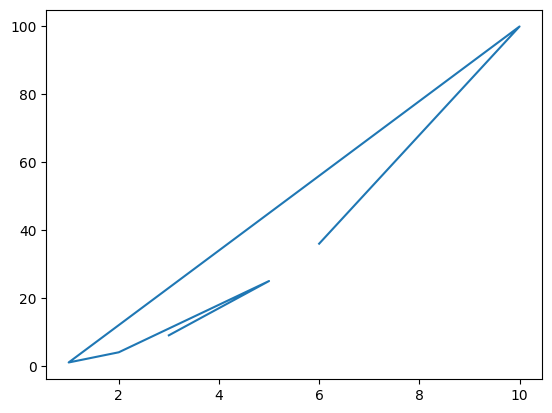

In [28]:
x = np.array([3, 5, 2, 1, 10, 6])
print(x)

y = np.power(x, 2)

plt.plot(x,y)

### Example 1: Making an array with `np.linspace`

Run the cell below to load up the `np.linspace` documentation and read about how to use `np.linspace`.

In [29]:
np.linspace?

Signature:      
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
    *,
    device=None,
)
Call signature:  np.linspace(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function linspace at 0x106f44720>
File:            ~/miniconda3/lib/python3.12/site-packages/numpy/_core/function_base.py
Docstring:      
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In 

Now, in the cell below, using `np.linspace`, create a new `x` array that has 100 points between 1 and 5. This new `x` array will have a higher <b>resolution</b> than our old `x` array.

In [31]:
x = np.linspace(1, 5, num=100)

Now, run the cell below to re-define the `y` array with your new `x` values, and plot the result. It should look much less jagged than the $y=x^2$ plot we made earlier.

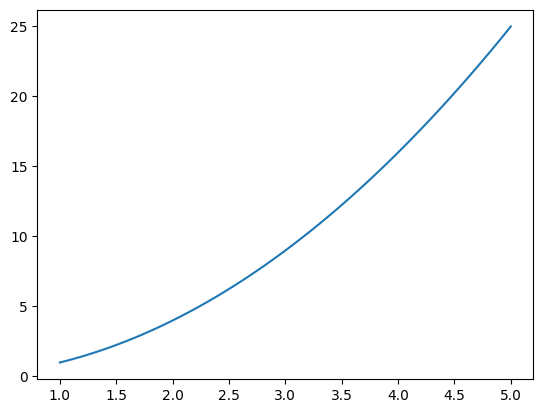

In [32]:
y = np.power(x, 2)

plt.plot(x, y)

## Customizing plots

We're going to do everything we can to make the plot above look not only nicer, but customized too. Here's where coding/plotting is more of an art than a science.

The first thing to do here, is actually see the points that `matplotlib` is plotting, rather than the lines it's drawing between those points.

In [70]:
# Make x have lower resolution so we can see the points
x = np.linspace(1,5,num=10)
y = np.power(x,2)

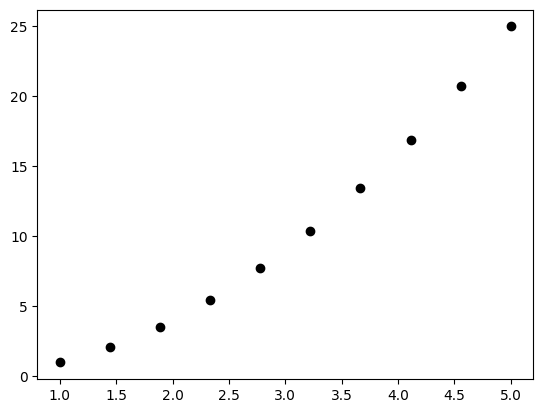

In [72]:
plt.plot(x, y, 'ko')

plt.savefig('Great_plot1.png')

What did I just do to make points appear instead of a line? Well, that extra argument in `plt.plot` is called a <b>format string</b>. You should read about these on the `plt.plot` documentation page, <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html">here</a>

### Example 2: Reading the `plt.plot` documentation

Learning how to read documentation is an incredibly important part of coding. Reading the `plt.plot` documentation is especially important, because `plt.plot` is an incredibly powerful and flexible function. Another valuable place to learn about how to do things with `matplotlib` is the <a href="https://matplotlib.org/stable/gallery/index.html">gallery</a> that shows you the source code for making tons of plots and customizing them with `matplotlib`. You might find the format string example in the gallery helpful as well.

Look through the `plt.plot` documentation page above, take a quick glance, and also ctrl+F to search the page for "format string" and see what the documentation page has to say about format strings. With what you've learned from reading, answer the questions below.

<b>1). What are a few "kwargs" (keyword arguments) that you can add to a `plt.plot` function call?

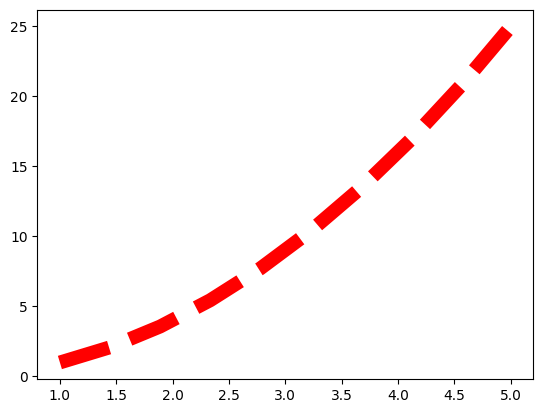

In [43]:
plt.plot(x,y, color='red', linewidth=10, linestyle='--')

<b>2). Edit and run the cell below to plot `x` and `y` data with a format string that will make the marker be star-shaped, the line be dashed, and the color be red.

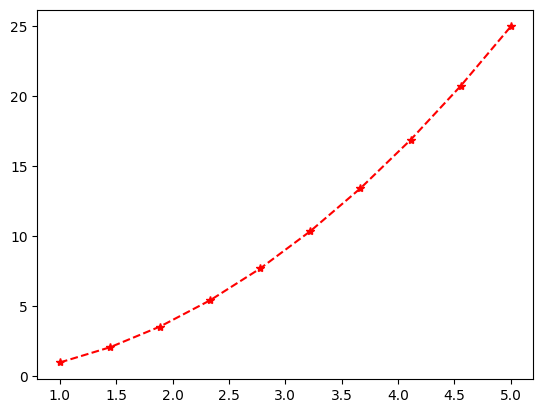

In [48]:
plt.plot(x,y, 'r*--')

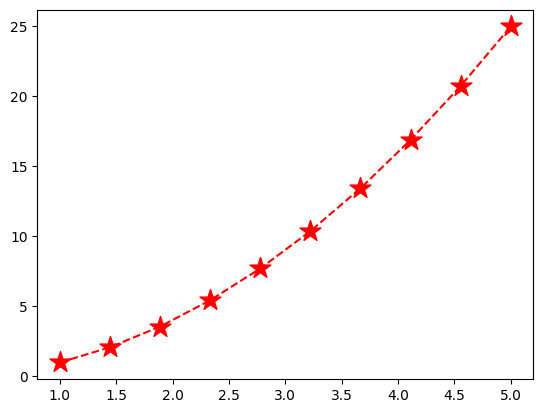

In [50]:
plt.scatter(x,y, color='red', marker='*', s=250)
plt.plot(x,y, color='red', linestyle='--')

### `plt.plot` keyword arguments

As you might have read in the documentation, `plt.plot` has a ton of <b>keyword arguments</b> that you can use to customize your plots. 

A <b>keyword argument</b> is an argument that is optional to a function, and must be explicitly declared when you're calling the function. For example, for the keyword argument `color`, we must explicitly say `color=NAME_OF_COLOR` in `plt.plot`, as below:

In [ ]:
plt.plot(x,y, color = "Red")

Note, you can specify a color with a name, or a <b>hex code</b>. There are many websites that will give you the hexcode that represents a color, for example <a href="https://htmlcolorcodes.com/">this one</a>.

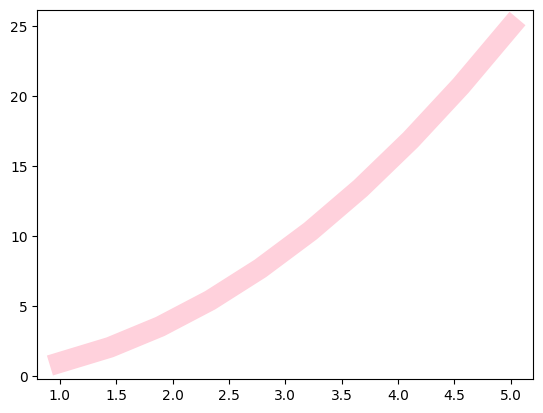

In [51]:
plt.plot(x, y, color = "#FFD1DC", linewidth = 15)
# This hexcode corresponds to the so-called "millennial pink"
# We also made the line thicker so we can see it better

`plt.plot`'s keyword arguments can do what format strings can do, and even more. For example, let's create the plot from example 2.2 but with keyword arguments instead of format strings and we can even make the markers bigger.

If you'd like, feel free to edit the keyword arguments in the cell below, or add some as well!

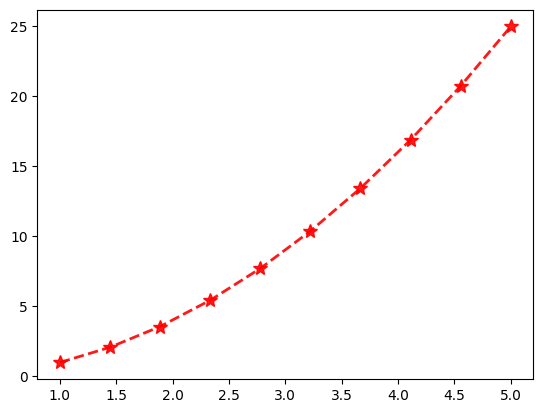

In [53]:
plt.plot(x, y, color = 'red', marker = '*', markersize = 10, linestyle = 'dashed', linewidth = 2, alpha = 0.9)

### The label kwarg and the legend

An important keyword argument is `label`. This will tell `matplotlib` what to call the line that you're plotting in a legend. This is especially important because we can plot many lines in one figure. For example:

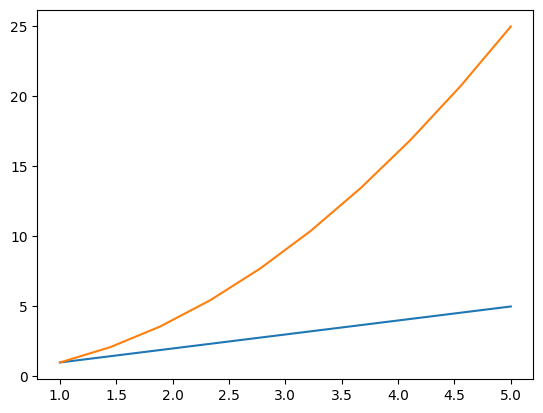

In [54]:
parabola = np.power(x, 2)
linear = x

# The label is just a string that labels that particular plot
plt.plot(x, linear, label = "y = x")
plt.plot(x, parabola, label = "y = x^2")

To make those labels appear, we call a new function, called `plt.legend()`

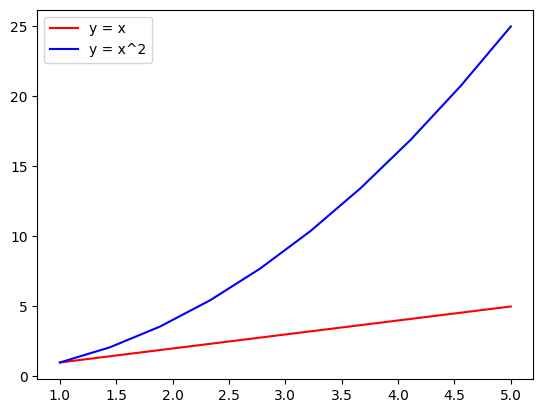

In [55]:
plt.plot(x, linear, color = 'red', label = "y = x")
plt.plot(x, parabola, color = 'blue', label = "y = x^2")

plt.legend()

You can move the legend around too, with the `loc` keyword argument. 

Take a look at the legend documentation <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html">here</a> and then,
edit the cell above by adding the `loc` keyword argument into `plt.legend` to move the legend to a different part of the plot.

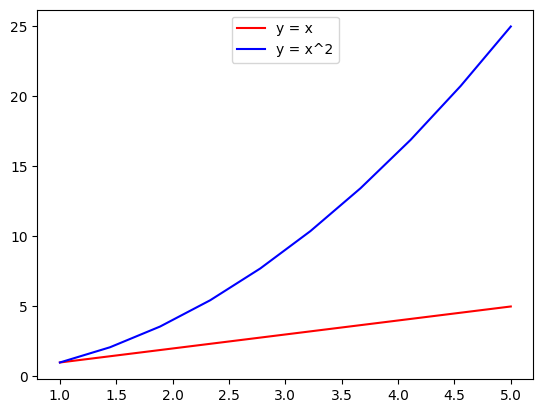

In [58]:
plt.plot(x, linear, color = 'red', label = "y = x")
plt.plot(x, parabola, color = 'blue', label = "y = x^2")

plt.legend(loc='upper center')

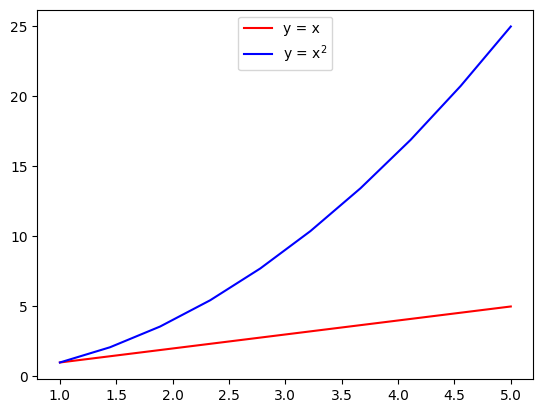

In [59]:
plt.plot(x, linear, color = 'red', label = "y = x")
plt.plot(x, parabola, color = 'blue', label = "y = x$^2$")

plt.legend(loc='upper center')

### Example 3: Labeling Axes

Let's label our axes. Look up/google how to label axes in matplotlib to figure out how. Then, edit the code in the cell above to add labels to the x, and y axes that describe what those axes mean and what units each axis is in.

Your stretch goal here should be to change the fontsize of the labels to make, in your opinion, the text a good size.

ValueError: x and y must have same first dimension, but have shapes (6,) and (10,)

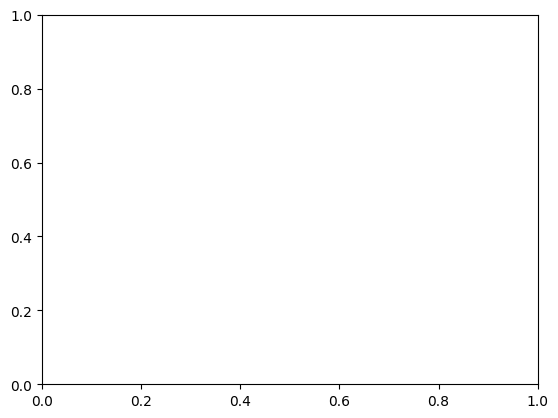

In [69]:
plt.plot(x, linear, color = 'red', label = "y = x")
plt.plot(x, parabola, color = 'blue', label = "y = x$^2$")

plt.legend(loc='upper center')


plt.xlabel("Dill Pickles", fontsize=12)
plt.ylabel("Dead Leaves", fontsize=12, color='red')



### Example 3: Log Scaling

Sometimes our data are spread over a large numerical range. If you care about both the small and large numbers in that range, a standard linear plot will "wash out" the smaller numbers. To remedy this problem, we log scale our axes. 

1). In the code cell below, define a numpy array called ```x```, with the following elements: 1, 2, 3, 4, 5, and 6.

In [63]:
x = np.array([1,2,3,4,5,6])

2). In the code cell below, define a numpy array called ```y``` which is $10^x$

In [64]:
y = 10**x

3). In the code cell below, plot ```y``` by ```x``` both as a line and as points on that line.

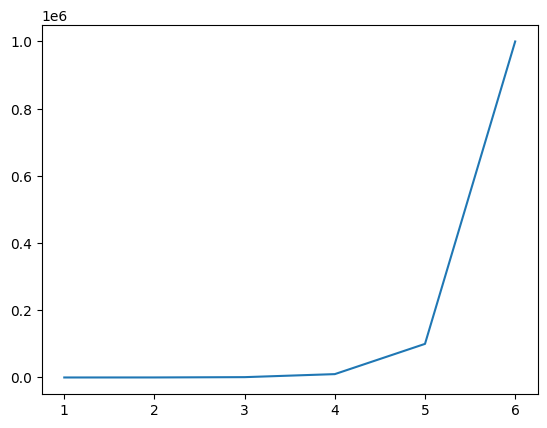

In [66]:
plt.plot(x,y)

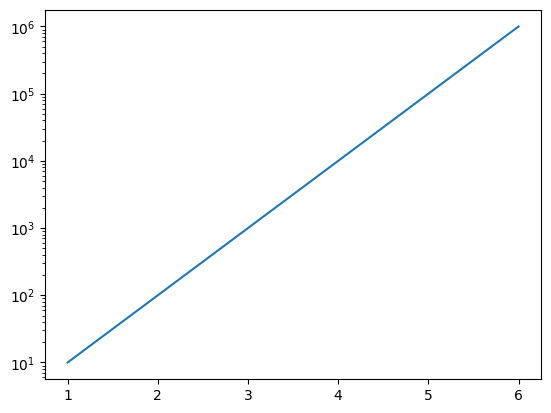

In [67]:
plt.plot(x,y)
plt.yscale('log')

4). Finally, in the code cell below, plot ```y``` by ```x```, and then add another line with ```plt.semilogy()```, how does this change your plot? Why might this be useful?

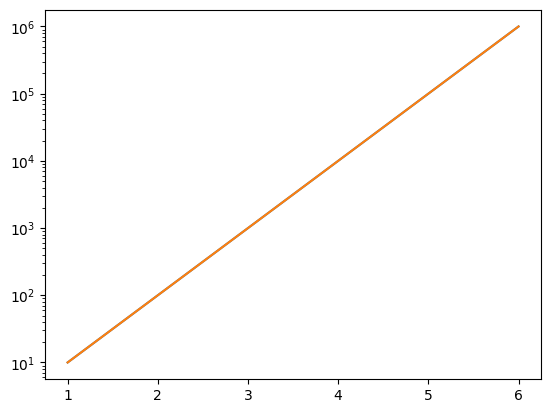

In [68]:
plt.plot(x,y)
plt.semilogy(x,y)

### Example 4: Subplots

<b>Subplots</b> are a way put multiple plots in what amounts to the same figure; think of subplots like an array of plots! You can read more about the `plt.subplots` syntax [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html). The syntax for setting labels and titles can be slightly different when using subplots than when making just one plot. I tend to use `plt.subplots` for all my plotting, even with just one plot. If you don't specify `nrows` and `ncols`, you will just produce one plot.

Subplots are great for displaying multiple data that share an x or y axis. For this example, let's make two subplots in one row. On the left we will plot our `x` and `y`, and on the right, let's have our logged axes

In [ ]:
plt.subplots() 